# Decision Boundaries

In [1]:

import numpy as np
import matplotlib.pyplot as plt


In [3]:

def plot_decision_boundary(mu, boundary_func, x=np.linspace(-6, 8, 400), y=np.linspace(-6, 8, 400)):

    # Create a grid of points
    X, Y = np.meshgrid(x, y)

    # Compute the function values
    Z = np.array([boundary_func(xi, yi) for xi, yi in zip(np.ravel(X), np.ravel(Y))])
    Z = Z.reshape(X.shape)

    ### Plotting
    plt.figure(figsize=(8, 6))
    plt.contour(X, Y, Z, levels=[0], colors='red', linestyles='dashed')
    plt.contourf(X, Y, Z, levels=[0, Z.max()], colors='blue', alpha=0.5)
    plt.contourf(X, Y, Z, levels=[Z.min(), 0], colors='orange', alpha=0.5)
    plt.scatter(*mu[0], color='blue', label='Class 1 Mean')
    plt.scatter(*mu[1], color='orange', label='Class 2 Mean')
    plt.title('Decision Boundary')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.legend()
    plt.grid(True)
    plt.show()


def decision_boundary(mu, sigma, P):
    sig_inv = [np.linalg.inv(s) for s in sigma]

    W = [-0.5 * s_inv for s_inv in sig_inv]
    w = [np.dot(s_inv, m) for s_inv, m in zip(sig_inv, mu)]
    w0 = [
        -0.5 * np.dot(np.dot(m.T, s_inv), m) - 0.5 * np.log(np.linalg.det(s)) + np.log(p)
        for m, s_inv, s, p in zip(mu, sig_inv, sigma, P)
    ]

    # Define the decision function g(x) = g1(x) - g2(x); when g1 = g2 --> g1-g2 = 0
    decision_function = lambda x1, x2: (
        np.dot(np.dot([x1, x2], W[0]), [x1, x2]) + np.dot(w[0], [x1, x2]) + w0[0] -
        (np.dot(np.dot([x1, x2], W[1]), [x1, x2]) + np.dot(w[1], [x1, x2]) + w0[1])
    )

    return decision_function


def bhattacharyya_error_bound(mu, sigma, P):

    avg_sigma = np.sum(sigma, axis=0)/2
    delta_mu = mu[1] - mu[0]
    # Calculate Bhattacharyya coefficients
    t1 = 1/8 * np.dot(np.dot(delta_mu.T, np.linalg.inv(avg_sigma)), delta_mu)
    t2 = 0.5 * np.log(np.linalg.det(avg_sigma) / np.sqrt(np.linalg.det(sigma[0]) * np.linalg.det(sigma[1])))

    return np.sqrt(P[0] * P[1]) * np.exp(-(t1 + t2))


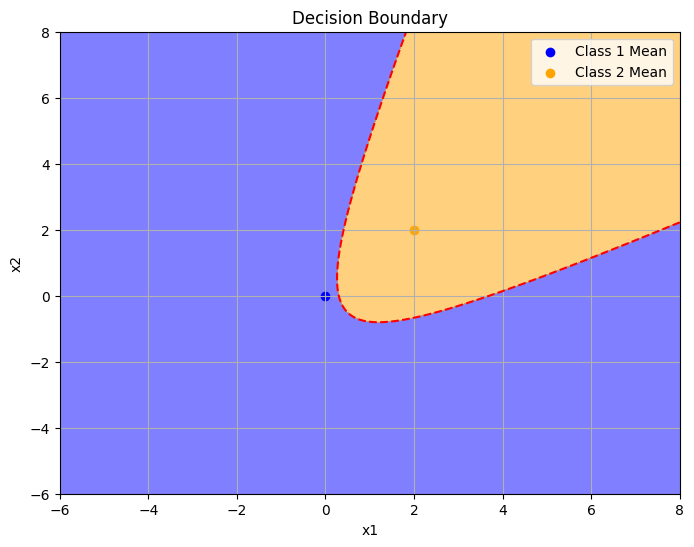


Bhattacharyya error bound: P(error) <= 0.2198


In [4]:

P = [0.25, 0.75]
mu = [np.array([0, 0]),
      np.array([2, 2])]
sigma = [np.array([[1, 0], [0, 2]]),
         np.array([[1, 1], [1, 2]])]

## decision boundary function ##
boundary_func = decision_boundary(mu, sigma, P)
plot_decision_boundary(mu, boundary_func)

## Bhattacharyya error bound ##
P_error = bhattacharyya_error_bound(mu, sigma, P)
print(f'\nBhattacharyya error bound: P(error) <= {P_error:.4f}')
